In [18]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [19]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 6:3:1
df = pd.read_csv('HPG Historical Data.csv', sep=",")
df=df['Price']

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df = df.str.replace(',', '').astype(float)


# Split the data into training, testing, and validation sets
train_size = int(0.9 * len(df))
test_size = int(0.1 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]

In [20]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [21]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [22]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[15846.95583479 15837.29770771 15827.63958064 15817.98145356
 15808.32332649 15798.66519941 15789.00707234 15779.34894526
 15769.69081819 15760.03269111 15750.37456403 15740.71643696
 15731.05830988 15721.40018281 15711.74205573 15702.08392866
 15692.42580158 15682.76767451 15673.10954743 15663.45142035
 15653.79329328 15644.1351662  15634.47703913 15624.81891205
 15615.16078498 15605.5026579  15595.84453083 15586.18640375
 15576.52827667 15566.8701496 ]


In [23]:
# 7. Đánh giá độ chính xác thuật toán
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

Testing RMSE: 5717.212984469417
Testing MAPE: 52.58167100426997
Testing MAE: 5623.625073193105


In [24]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[15846.95583479 15837.29770771 15827.63958064 15817.98145356
 15808.32332649 15798.66519941 15789.00707234 15779.34894526
 15769.69081819 15760.03269111 15750.37456403 15740.71643696
 15731.05830988 15721.40018281 15711.74205573 15702.08392866
 15692.42580158 15682.76767451 15673.10954743 15663.45142035
 15653.79329328 15644.1351662  15634.47703913 15624.81891205
 15615.16078498 15605.5026579  15595.84453083 15586.18640375
 15576.52827667 15566.8701496  15557.21202252 15547.55389545
 15537.89576837 15528.2376413  15518.57951422 15508.92138715
 15499.26326007 15489.60513299 15479.94700592 15470.28887884
 15460.63075177 15450.97262469 15441.31449762 15431.65637054
 15421.99824347 15412.34011639 15402.68198931 15393.02386224
 15383.36573516 15373.70760809 15364.04948101 15354.39135394
 15344.73322686 15335.07509979 15325.41697271 15315.75884563
 15306.10071856 15296.44259148 15286.78446441 15277.12633733
 15267.46821026 15257.81008318 15248.1

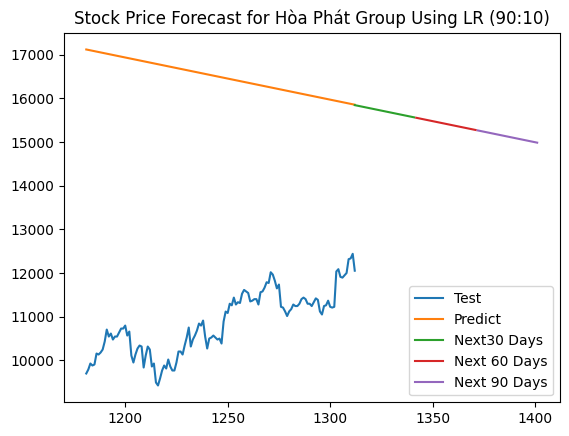

In [25]:
# 8.Vẽ hình
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(range(last_data.start, last_data.start + 30), y_next_90_days[:30])
plt.plot(range(last_data.start+30, last_data.start + 60), y_next_90_days[30:60])
plt.plot(range(last_data.start+60, last_data.start + 90), y_next_90_days[60:90])
plt.legend(['Test', 'Predict','Next30 Days', "Next 60 Days", "Next 90 Days"])
plt.title("Stock Price Forecast for Hòa Phát Group Using LR (90:10)")
plt.show()

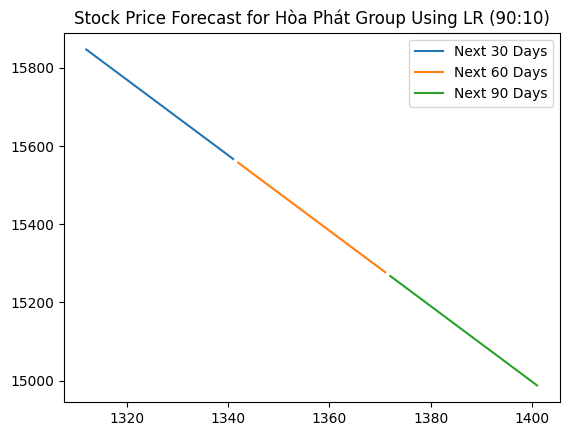

In [26]:
plt.plot(range(last_data.start, last_data.start + 30), y_next_90_days[:30])
plt.plot(range(last_data.start+30, last_data.start + 60), y_next_90_days[30:60]) # Slice y_next_90_days to match x-axis dimensions
plt.plot(range(last_data.start+60, last_data.start + 90), y_next_90_days[60:90])
plt.legend(["Next 30 Days", "Next 60 Days", "Next 90 Days"])
plt.title("Stock Price Forecast for Hòa Phát Group Using LR (90:10)")
plt.show()